##  Project  – Customer Churn Dataset

# Problem Statement:

You are the Data Scientist at a telecom company “Neo” whose customers are churning out to
its competitors. You have to analyse the data of your company and find insights and stop your
customers from churning out to other telecom companies.

Predicting customer churn is critical for telecommunication companies to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly.

The objective of the analysis is to obtain the relation between the customer’s characteristics and the churn.

we build a model to predict how likely a customer will churn by analyzing its characteristics: (1) demographic information, (2) account information, and (3) services information. The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.

The data set used in this article is available in the Kaggle (CC BY-NC-ND) and contains nineteen columns (independent variables) that indicate the characteristics of the clients of a fictional telecommunications corporation. The Churn column (response variable) indicates whether the customer departed within the last month or not. The class No includes the clients that did not leave the company last month, while the class Yes contains the clients that decided to terminate their relations with the company.

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 # Data Collection and Processing

In [2]:
customer_churn = pd.read_csv("C:\\Users\\rajee\\Desktop\\DS\\Int\\CP\\Dataset_CP\\customer_churn.csv")

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn.shape

(7043, 21)

In [6]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

## (1) Demographic Information

- gender: Whether the client is a female or a male (Female, Male).
    
- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
    
- Partner: Whether the client has a partner or not (Yes, No).
    
- Dependents: Whether the client has dependents or not (Yes, No).

## (2) Customer Account Information

- tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
    
- Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
    
- PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
    
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
    
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

## (3) Services Information

- PhoneService: Whether the client has a phone service or not (Yes, No).

- MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
    
- InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
    
- OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
    
- OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
    
- DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
    
- TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
    
- StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
    
- StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

In [7]:
## Desrciptive summary of the dataset
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# List down all the column names
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
## Duplicate Records : reflected by True
customer_churn[customer_churn.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Handling the outliers

In [13]:
# Take all columns into a single column "col"
col = list(customer_churn.columns)
col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

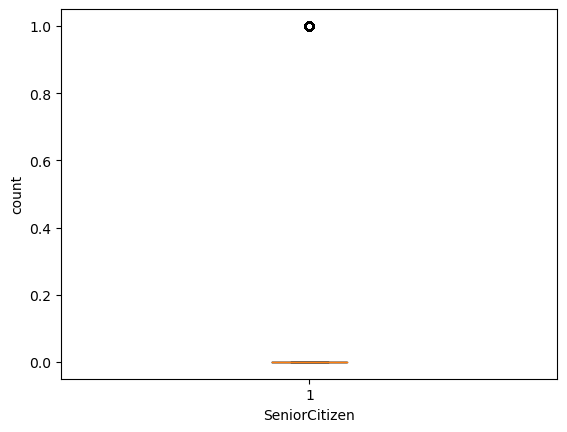

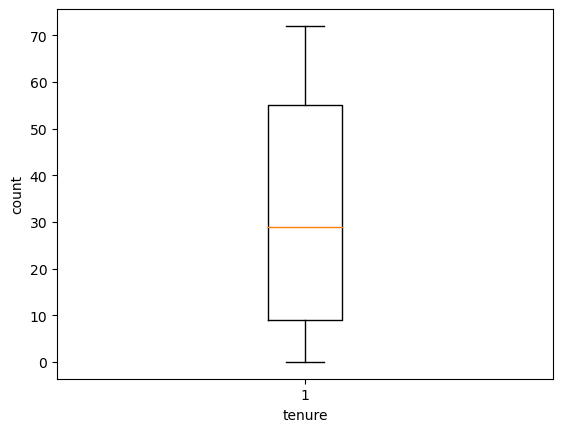

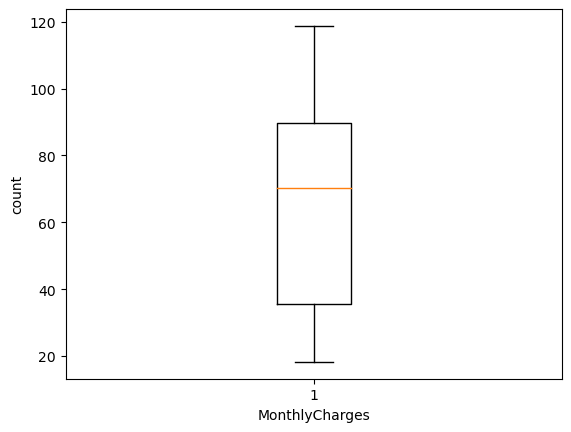

In [15]:
for col_name in col:
    if(customer_churn[col_name].dtypes == 'int64' or customer_churn[col_name].dtypes== 'float64'):
        plt.boxplot(customer_churn[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

## A) Data Manipulation:

a. Extract the 5th column & store it in ‘customer_5’

In [26]:
# Extract the 5th column and store it in 'customer_5'
customer_5 = pd.DataFrame(customer_churn.iloc[:, 4])

# Print the 'customer_5' variable to verify the extracted column
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


b. Extract the 15th column & store it in ‘customer_15’

In [25]:
# Extract the 15th column and store it in 'customer_15'
customer_15 = pd.DataFrame(customer_churn.iloc[:, 14])

# Print the 'customer_15' variable to verify the extracted column
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


As shown below, some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [ ]:
# remove (automatic) from payment method names
# customer_churn['PaymentMethod'] = customer_churn['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

NOTE: A stacked bar chart is a type of bar chart that portrays the compositions and comparisons of several variables through time.

c. Extract all the male senior citizens whose Payment Method is Electronic check &
store the result in ‘senior_male_electronic’

In [27]:
# Filter the dataset to extract male senior citizens with Electronic check payment method
senior_male_electronic = pd.DataFrame(customer_churn[(customer_churn['gender'] == 'Male') & 
                                        (customer_churn['SeniorCitizen'] == 1) & 
                                        (customer_churn['PaymentMethod'] == 'Electronic check')])

# Print the 'senior_male_electronic' DataFrame to see the extracted data
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


d. Extract all those customers whose tenure is greater than 70 months or their
Monthly charges is more than 100$ & store the result in ‘customer_total_tenure

In [28]:
# Filter the dataset to extract customers with tenure greater than 70 months or Monthly charges more than $100
customer_total_tenure = pd.DataFrame(customer_churn[
    (customer_churn['tenure'] > 70) |
    (customer_churn['MonthlyCharges'] > 100)
])

# Print the 'customer_total_tenure' DataFrame to see the extracted data
customer_total_tenure


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


e. Extract all the customers whose Contract is of two years, payment method is Mailed
check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes

In [29]:
# Filter the dataset to extract customers with a two-year Contract, Mailed check payment method, and Churn value as 'Yes'
two_mail_yes = pd.DataFrame(customer_churn[
    (customer_churn['Contract'] == 'Two year') &
    (customer_churn['PaymentMethod'] == 'Mailed check') &
    (customer_churn['Churn'] == 'Yes')
])

# Print the 'two_mail_yes' DataFrame to see the extracted data
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


f. Extract 333 random records from the customer_churndataframe& store the result in
‘customer_333’

In [31]:
# Extract 333 random records from the dataset
customer_333 = pd.DataFrame(customer_churn.sample(n=333, random_state=42))

# Print the 'customer_333' DataFrame to see the extracted data
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1199.4,No
3601,1552-CZCLL,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,1087.25,No
2149,2014-MKGMH,Female,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.10,4674.4,No
5141,0303-WMMRN,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


g. Get the count of different levels from the ‘Churn’ column

In [33]:
# Get the count of different levels from the 'Churn' column
churn_counts = customer_churn['Churn'].value_counts()

# Print the churn_counts
print(churn_counts)

No     5174
Yes    1869
Name: Churn, dtype: int64


## B) Data Visualization:

a. Build a bar-plot for the ’InternetService’ column:
    
i. Set x-axis label to ‘Categories of Internet Service’

ii. Set y-axis label to ‘Count of Categories’

iii. Set the title of plot to be ‘Distribution of Internet Service’

iv. Set the color of the bars to be ‘orange’

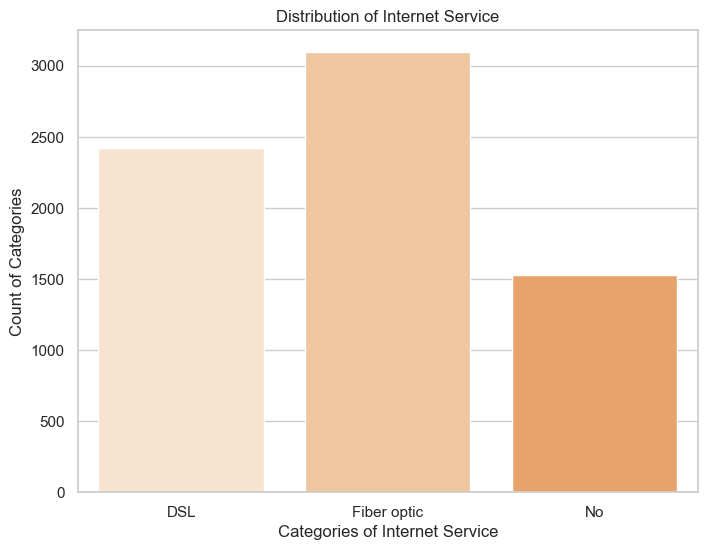

In [35]:
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Set the color palette
sns.set_palette("Oranges")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=customer_churn)
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Display the plot
plt.show()

b. Build a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’

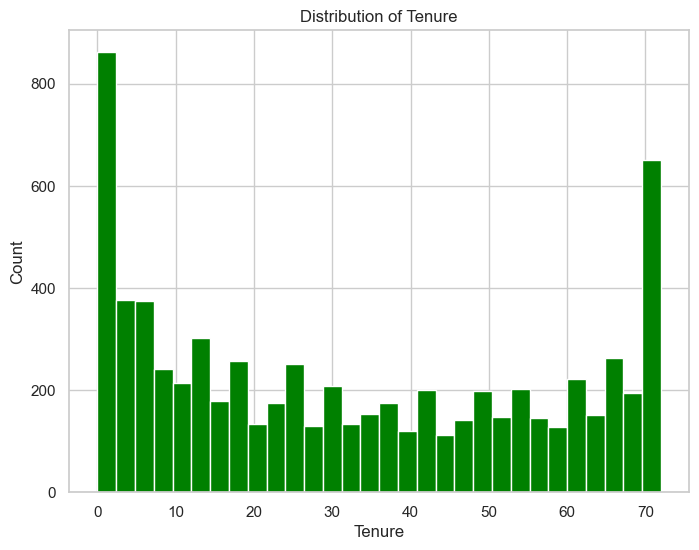

In [36]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(customer_churn['tenure'], bins=30, color='green')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
the y-axis & ‘tenure’ to the ‘x-axis’:
    
i. Assign the points a color of ‘brown’

ii. Set the x-axis label to ‘Tenure of customer’

iii. Set the y-axis label to ‘Monthly Charges of customer’

iv. Set the title to ‘Tenure vs Monthly Charges

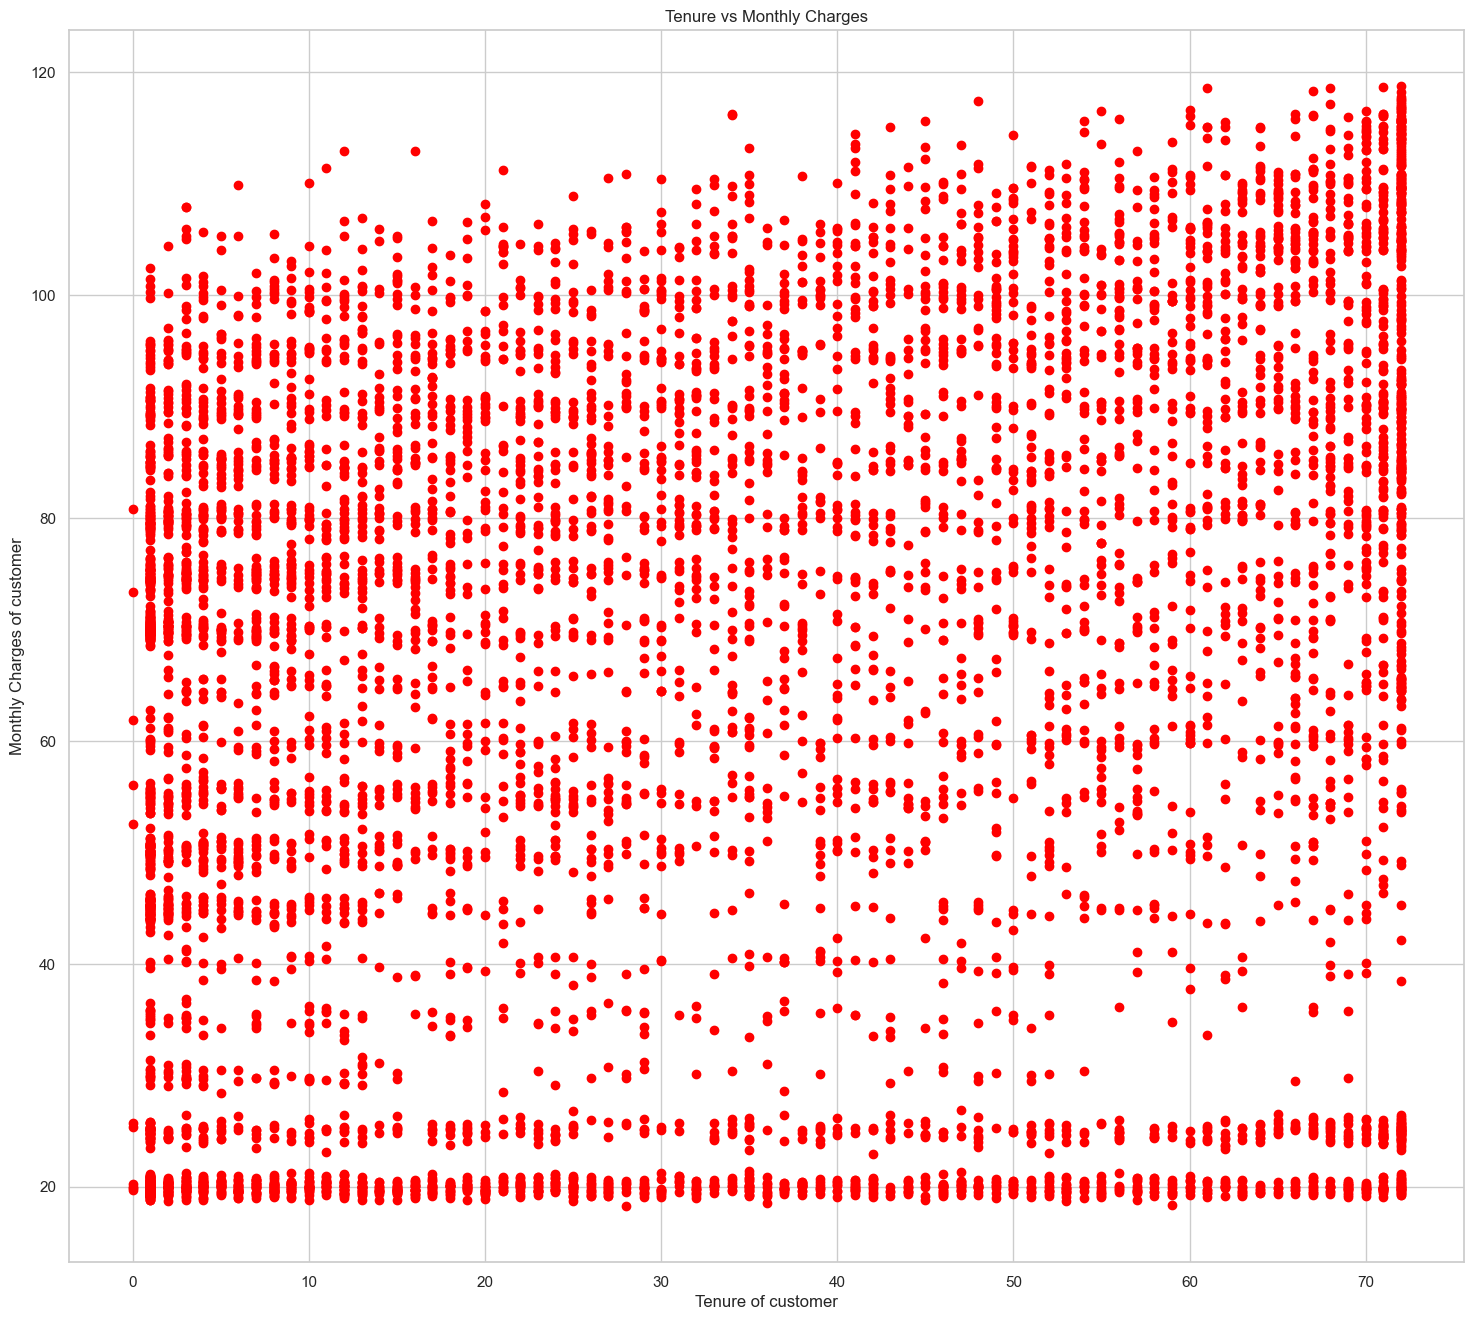

In [40]:
# Create the scatter plot
plt.figure(figsize=(18, 16))
plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'], color='red')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

# Display the plot
plt.show()

d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
‘Contract’ on the x-axis.

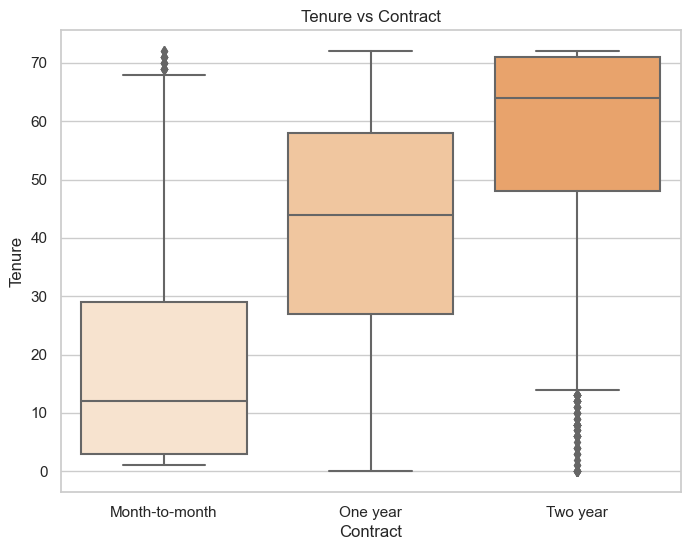

In [41]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='tenure', data=customer_churn)
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')

# Display the plot
plt.show()

## C) Linear Regression:

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
# Split the dataset into train and test sets
X = customer_churn[['tenure']]  # Independent variable(s)
y = customer_churn['MonthlyCharges']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [46]:
# Print the model evaluation scores
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.0626576225553942
Test Score: 0.05856035027031625


In [48]:
# Build the model on the train set and predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:
# Calculate the root mean square error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [50]:
# Store the errors in 'error'
error = y_test - y_test_pred

In [51]:
# Print the RMSE and 'error'
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Error:", error)

Train RMSE: 29.17872350702081
Test RMSE: 29.07936015646814
Error: 185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


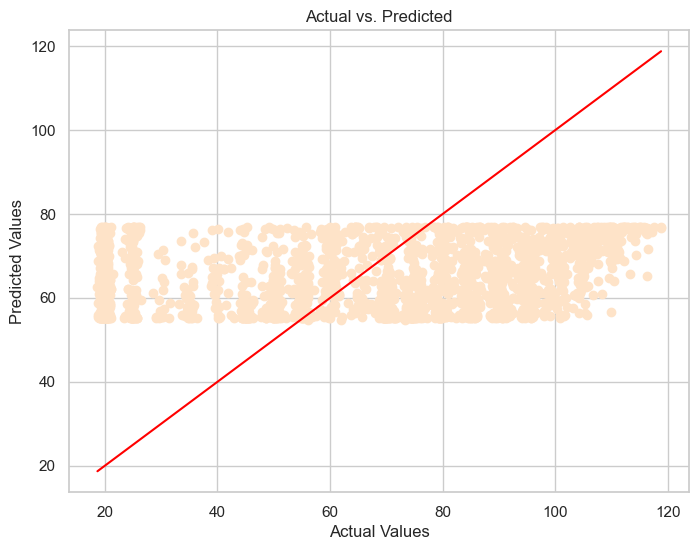

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the actual values in 'y_test' and predicted values in 'y_test_pred'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

# Display the plot
plt.show()

# D) Logistic Regression:

a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
independent variable is ‘MonthlyCharges’

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [56]:
# Split the dataset into train and test sets
X = customer_churn[['MonthlyCharges']]  # Independent variable(s)
y = customer_churn['Churn']  # Dependent variable

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [62]:
# Build the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

In [63]:
# Get the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)

In [64]:
# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_mat)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[1797    0]
 [ 669    0]]

Accuracy Score: 0.7287104622871047


#  Receiver Operating Characteristic (ROC) Curve & Precision-Recall Curve:

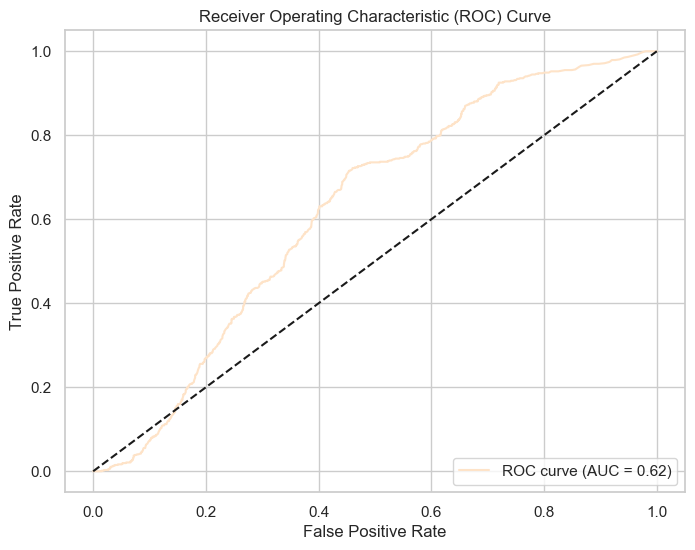

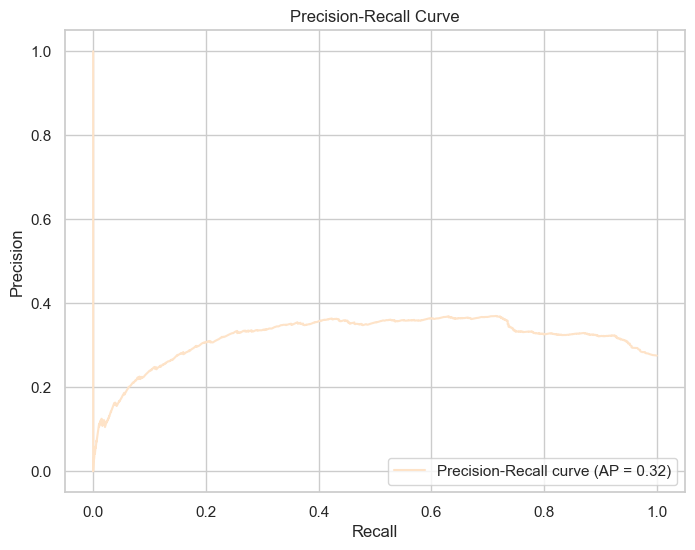

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np

# Convert 'Churn' to binary form where 'No' is mapped to 0 and 'Yes' is mapped to 1
y_test_binary = np.where(y_test == 'Yes', 1, 0)

# Obtain the predicted probabilities for the positive class
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_pred_prob)
auc_score = roc_auc_score(y_test_binary, y_test_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_test_pred_prob)
avg_precision = average_precision_score(y_test_binary, y_test_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (AP = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
independent variables are ‘tenure’ & ‘MonthlyCharges’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [72]:
# Select the independent variables and dependent variable
X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn']

In [73]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [74]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [76]:
# Build the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

In [77]:
# Get the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)

In [78]:
# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_mat)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[944  92]
 [193 180]]

Accuracy Score: 0.7977288857345636


# Confusion Matrix Heatmap:

A confusion matrix heatmap provides a visual representation of the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

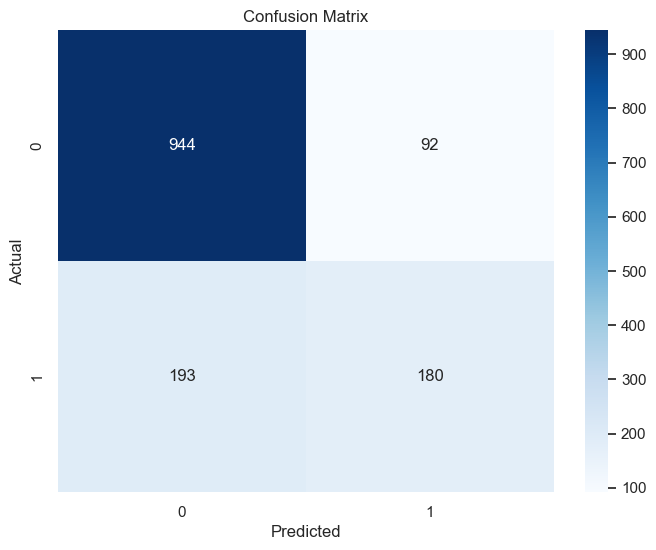

In [79]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  E) Decision Tree:

a. Build a decision tree model where dependent variable is ‘Churn’ & independent
variable is ‘tenure’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [86]:
# Select the independent variable and dependent variable
X = customer_churn[['tenure']]
y = customer_churn['Churn']

In [87]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

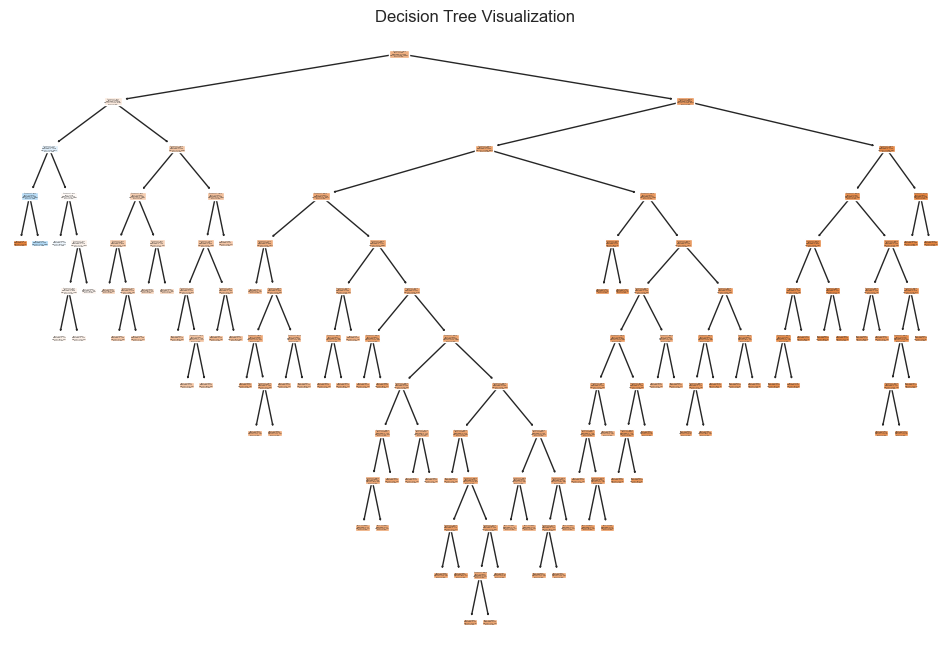

In [99]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['tenure'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [92]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [93]:
# Build the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

In [94]:
# Get the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)

In [95]:
# Get the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)

In [96]:
# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_mat)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[951  85]
 [257 116]]

Accuracy Score: 0.7572746628814763


In [130]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score=accuracy_score(y_test_pred,y_test)
print(score)
print(classification_report(y_test_pred,y_test))

0.7529578797917653
              precision    recall  f1-score   support

          No       0.86      0.81      0.84      1633
         Yes       0.46      0.55      0.50       480

    accuracy                           0.75      2113
   macro avg       0.66      0.68      0.67      2113
weighted avg       0.77      0.75      0.76      2113



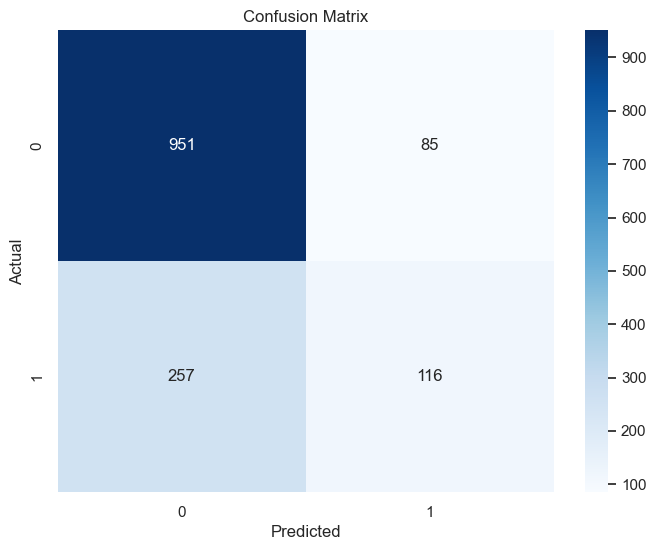

In [100]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## F) Random Forest:

In [101]:
# Select the independent variables and dependent variable
X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn']

In [102]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [104]:
# Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [106]:
# Build the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

In [107]:
# Get the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)

In [108]:
# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_mat)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[1325  214]
 [ 308  266]]

Accuracy Score: 0.7529578797917653


In [111]:
params={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
           'criterion':['gini','entropy']
       
       }

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
cv=RandomizedSearchCV(model,param_distributions=params,cv=5,scoring='accuracy',verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.795 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.783 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.781 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.788 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.779 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.798 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.783 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.778 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.788 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.783 total time=   0.4s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [ ]:
cv.best_params_

# Feature Importance Plot:

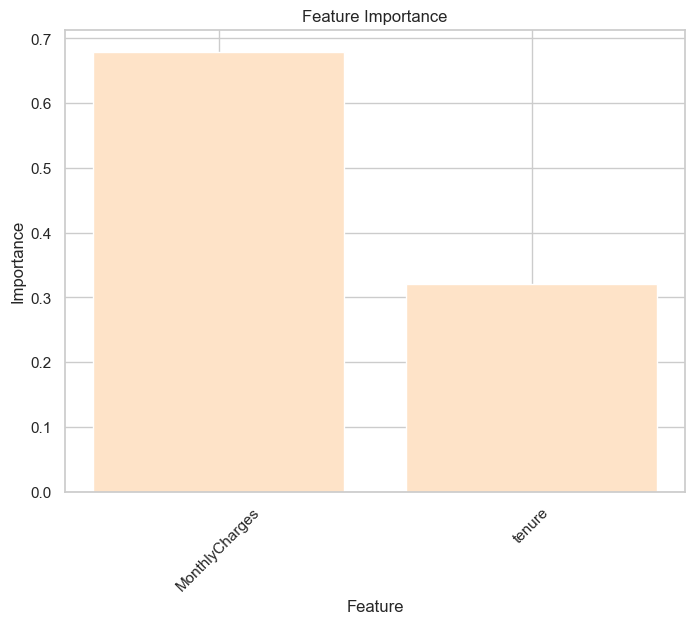

In [109]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()